#  <span style="text-decoration:underline;">Assignment 2</span>: Clustering Yelp Data

## Introduction 

In this assignment, we will be working with the [Yelp data set](http://cs-people.bu.edu/bahargam/506/yelp_dataset_challenge_academic_dataset.tar). You can find information about the format of the data set [here](https://www.yelp.com/dataset_challenge).

## Submission 

Please use the following invitation link to create your assignment repository for this assignment: [https://classroom.github.com/a/nowbCi7s](https://classroom.github.com/a/nowbCi7s). Include your BU username within your submission by adding it here: **goka**.

Do not delete the output of your code cells. This assignment must be completed **individually** by each student.

## <span style="text-decoration:underline;">Problem 1</span>: Clustering, Scaling, and Visualizing

**<span style="text-decoration:underline;">Part A</span> (35 points):** From the Business Objects data set (`yelp_academic_dataset_business.json`), we want to find culinary districts in Las Vegas. These districts are characterized by the physical proximity and similarity of restaurants. We can use `longitude` and `latitude` to cluster for proximity, and `categories` to cluster for similarity. Only a subset (the top 15) of the most popular categories should be used.

Note that the spatial coordinates and restaurant categories have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.

Find clusters using $k$-means++ (you are permitted to use the implementation available in scikit-learn). Explain your data representation and how you determined the number of clusters in $k$-means++.

**<span style="text-decoration:underline;">Part B</span> (15 points):** Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot. Label each cluster with a category. In a markdown, explain how labels are assigned.

Note that some categories are inherently more common (e.g., "pizza"). When labeling your clusters, you want to avoid the scenario where all clusters are labeled as "pizza" simply because of the uniformly large number of these restaurants across all clusters. In other words, we don’t want to point out that pizza restaurants are pretty much evenly distributed in high quantities everywhere, but rather discover when they, or another type of restaurant, appear in notably high quantities.

In [1]:
import pandas as pd
import numpy as np
import json
import operator
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from pandas.io.json import json_normalize
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import json
import operator
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from pandas.io.json import json_normalize
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import scipy as sp
import json
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)

2610
2610


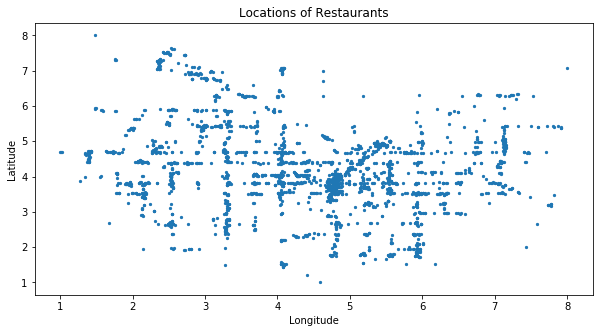

In [2]:
df1 = df[(df['city'] == 'Las Vegas')]
new_df = df1[df1.categories.map(lambda x: 'Restaurants' in x)]
long=new_df['categories']
dic={}
for i in new_df['categories']:
    for j in i:
        if j not in dic:
            dic[j]=1
        else:
            dic[j]+=1
lc = [[dic[key],key]for key in dic]
lc.sort()
lc.reverse()
top15 = lc[1:16]
topkeys=[]
for i in top15:
    topkeys.append(i[1])
from sklearn.preprocessing import MinMaxScaler
categories = ['Mexican', 'Fast Food', 'Pizza', 'American (Traditional)', 'Sandwitches', 'Breakfast & Brunch', 'Chinese', 'Italian']

find = [] 
find2= [] 
for line in df.itertuples():
    if line.city == "Las Vegas":
        tmp = []
        flag = 0
        
        for cat in categories:
            if cat in line.categories:
                flag = 1
                tmp.append(1)
            else:
                tmp.append(0)
                
        if flag == 1:
            find.append([line.longitude,line.latitude])
            find2.append(tmp)
arr = np.asarray(find)
scaler = MinMaxScaler(copy=True, feature_range=(1, 8))
scaler.fit(arr)
s = scaler.transform(arr)
k = s.tolist()

for i in range(len(k)):
    k[i] += find2[i]

k = np.asarray(k)
plt.figure(figsize=(10,5))
_ = plt.scatter(k[:, 0], k[:, 1], s = 5)   
plt.title('Locations of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

c:\users\ada-g\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


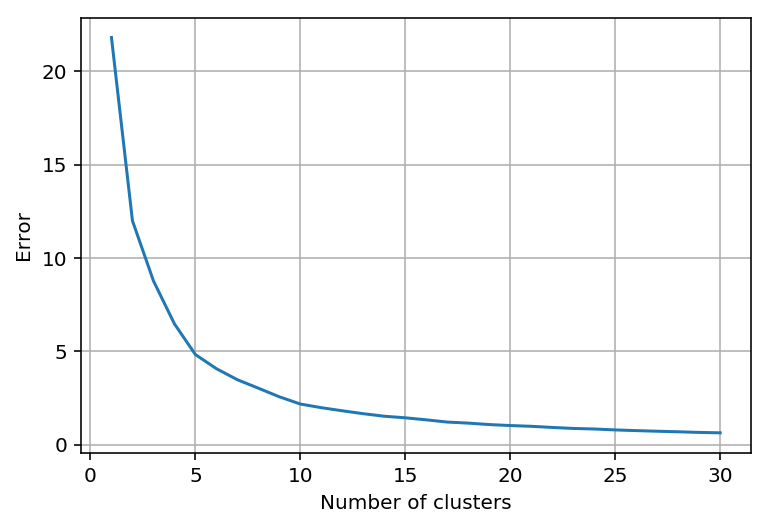

According to the figure, n = 8 is a point that makes a sharp change


In [18]:
#K-means error

def eval_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')
    plt.grid("True")
    plt.show()

eval_clusters(find,30) 


c:\users\ada-g\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


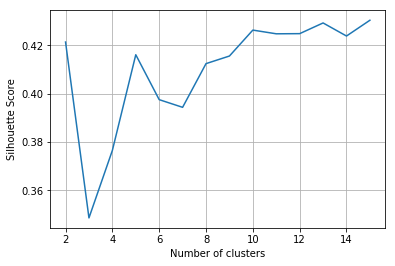

In [4]:
#silhouette_score

def sc_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.grid("True")
    plt.show()
    
sc_clusters(find,15)

In [5]:
import seaborn as sns
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=100)
y_kmeans = kmeans.fit_predict(k)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
labelsCat=labels
error = kmeans.inertia_

In [6]:
from operator import add
clus0 = []
clus1 = []
clus2 = []
clus3 = []
clus4 = []
clus5 = []
clus6 = []
clus7 = []

for i in range(len(k)):
    if labels[i] == 0:
        clus0.append(list(k[i]))
    elif labels[i] == 1:
        clus1.append(list(k[i]))
    elif labels[i] == 2:
        clus2.append(list(k[i]))
    elif labels[i] == 3:
        clus3.append(list(k[i]))
    elif labels[i] == 4:
        clus4.append(list(k[i]))
    elif labels[i] == 5:
        clus5.append(list(k[i]))
    elif labels[i] == 6:
        clus6.append(list(k[i]))
    else:
        clus7.append(list(k[i]))

a0 = clus0[0]
for i in range(1,len(clus0)):
    a0 = (list(map(add, a0, clus0[i])))
print(a0)

a1 = clus1[0]
for i in range(1,len(clus1)):
    a1 = (list(map(add, a1, cluster1[i])))
print(a1)

a2 = clus2[0]
for i in range(1,len(clus2)):
    a2 = (list(map(add, a2, clus2[i])))
print(a2)

a3 = clus3[0]
for i in range(1,len(clus3)):
    a3 = (list(map(add, a3, clus3[i])))
print(a3)

a4 = clus4[0]
for i in range(1,len(clus4)):
    a4 = (list(map(add, a4, clus4[i])))
print(a4)

a5 = clus5[0]
for i in range(1,len(clus5)):
    a5 = (list(map(add, a5, clus5[i])))
print(a5)
a6 = clus6[0]
for i in range(1,len(clus6)):
    a6 = (list(map(add, a6, clus6[i])))
print(a6)

a7 = clus7[0]
for i in range(1,len(clus7)):
    a7 = (list(map(add, a7, clus7[i])))
print(a7)

print(type(a5.index(max(a5[2:]))))

[988.9235123533808, 2036.3365075641307, 68.0, 108.0, 74.0, 50.0, 0.0, 25.0, 31.0, 30.0]
[1875.1757426557815, 1273.8458041844237, 103.0, 90.0, 44.0, 30.0, 0.0, 11.0, 28.0, 8.0]
[1522.1470598239707, 1657.696771503457, 92.0, 92.0, 50.0, 33.0, 0.0, 21.0, 116.0, 24.0]
[710.0699203811878, 1392.5851483527742, 64.0, 70.0, 73.0, 54.0, 0.0, 33.0, 33.0, 54.0]
[1373.467962181032, 577.4177174272785, 55.0, 68.0, 61.0, 49.0, 0.0, 13.0, 22.0, 25.0]
[3262.4805518242547, 2512.0976221739065, 149.0, 160.0, 126.0, 0.0, 0.0, 52.0, 90.0, 117.0]
[1164.4531367635823, 905.8829578145549, 2.0, 8.0, 3.0, 233.0, 0.0, 28.0, 3.0, 1.0]
[586.9583542586533, 479.94313795578535, 37.0, 61.0, 37.0, 30.0, 0.0, 20.0, 22.0, 19.0]
<class 'int'>


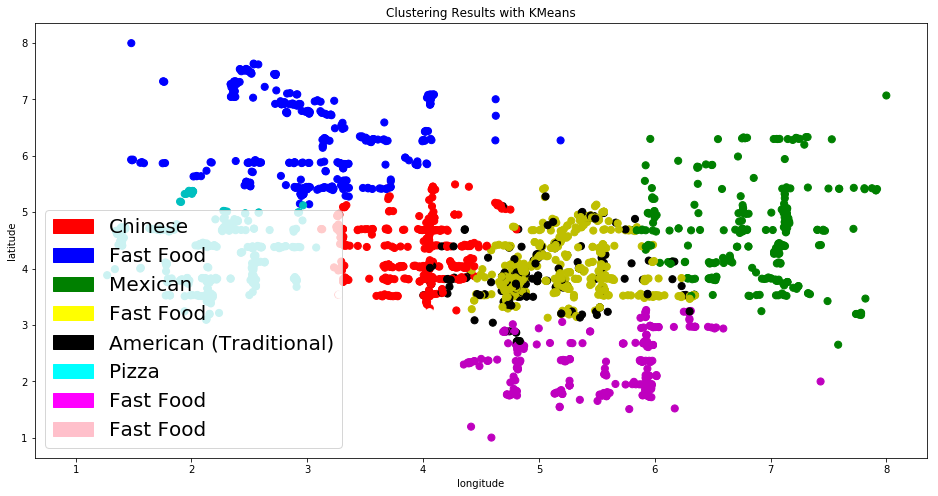

In [7]:
import matplotlib.patches as mpatches
colors = ['bgrcmykw'[p] for p in labels]
plt.figure(figsize=(16,8))
blue_patch = mpatches.Patch(color='blue', label=categories[a0.index(max(a0[2:])) - 2])
green_patch = mpatches.Patch(color='green', label=categories[a1.index(max(a1[2:])) - 2])
red_patch = mpatches.Patch(color='red', label=categories[a2.index(max(a2[2:])) - 2])
cyan_patch = mpatches.Patch(color='cyan', label=categories[a3.index(max(a3[2:]))-2])
magenta_patch = mpatches.Patch(color='magenta', label=categories[a4.index(max(a4[2:]))-2])
yellow_patch = mpatches.Patch(color='yellow', label=categories[a5.index(max(a5[2:]))-2])
black_patch = mpatches.Patch(color='black', label=categories[a6.index(max(a6[2:]))-2])
white_patch = mpatches.Patch(color='pink', label=categories[a7.index(max(a7[2:]))-2])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,cyan_patch,magenta_patch,white_patch], loc = 'lower left', prop={'size': 20})
plt.title('Clustering Results with KMeans')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(k[:, 0], k[:, 1], color=colors, s=50)

In [ ]:
def outlier(clus,need,center):
    for i in range(len(clus)):
        dst = distance.euclidean(clus[i], center)
        need.append(dst)
        need.sort()
    a = need[int(len(need) * .95)]

    for i in range(len(clus)):
        dst = distance.euclidean(clus[i], center)
        if dst >= a:
            need = dst
            outlier0.append(clus[i][:2])
    
    return outlier0
from scipy.spatial import distance
# print(len(cluster1))
center0 = centers[0]
center1 = centers[1]
center2 = centers[2]
center3 = centers[3]
center4 = centers[4]
center5 = centers[5]
center6 = centers[6]
center7 = centers[7]

outlier0 = []
outlier1 = []
outlier2 = []
outlier3 = []
outlier4 = []
outlier5 = []
outlier6 = []
outlier7 = []

need0 = []
need1 = []
need2 = []
need3 = []
need4 = []
need5 = []
need6 = []
need7 = []
a = 0

outlier0 = outlier(clus0,need0,center0)
outlier1 = outlier(clus1,need1,center1)
outlier2 = outlier(clus2,need2,center2)
outlier3 = outlier(clus3,need3,center3)
outlier4 = outlier(clus4,need4,center4)
outlier5 = outlier(clus5,need5,center5)
outlier6 = outlier(clus6,need6,center6)
outlier7 = outlier(clus7,need7,center7)


ot = outlier0+outlier1+outlier2+outlier3+outlier4+outlier5+outlier6+outlier7

print(center1[0])
print(ot)

Text(0.5,1,'K-means  outlier')

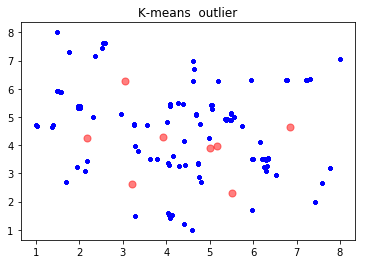

In [9]:
ot = np.asarray(ot)

plt.scatter(ot[:, 0], ot[:, 1], color='b', s=10)
plt.scatter(center0[0], center0[1], c='red', s=50, alpha=0.5);
plt.scatter(center1[0], center1[1], c='red', s=50, alpha=0.5);
plt.scatter(center2[0], center2[1], c='red', s=50, alpha=0.5);
plt.scatter(center3[0], center3[1], c='red', s=50, alpha=0.5);
plt.scatter(center4[0], center4[1], c='red', s=50, alpha=0.5);
plt.scatter(center5[0], center5[1], c='red', s=50, alpha=0.5);
plt.scatter(center6[0], center6[1], c='red', s=50, alpha=0.5);
plt.scatter(center7[0], center7[1], c='red', s=50, alpha=0.5);
plt.title("K-means  outlier")

## <span style="text-decoration:underline;">Problem 2</span>: Outliers and Unsupervised Clustering

**<span style="text-decoration:underline;">Part A</span> (15 points):** Detect the top five outliers for each cluster that you generated in Problem 1. These are the restaurants that are the farthest from the centroids of their clusters.

**<span style="text-decoration:underline;">Part B</span> (35 points):** Cluster the restaurants using the text of the restaurant reviews (rather than the categories) in an unsupervised fashion. Use the document-term matrix approach and tf-idf. Finally, use one cluster comparison metric to compare your results from Problem 1 to your unsupervised clustering results from Problem 2.

In [19]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
import json
business = {}
with open('yelp_academic_dataset_business.json') as f:
    for line in f:
        tmp = json.loads(line)
        if tmp['city']=='Las Vegas':
            if 'Restaurants' in tmp['categories']:
                business[tmp['business_id']] = {'latitude':tmp['latitude'], 'longitude':tmp['longitude']}

In [12]:
with open('yelp_academic_dataset_review.json') as f:
    for line in f:
        tmp = json.loads(line)
        if tmp['business_id'] in business:
            if 'review' in tmp['business_id']:
                business[tmp['business_id']]['review'] = ''.join(str(tmp['text']))
            else:
                business[tmp['business_id']]['review'] = tmp['text']

In [13]:
name_id = []
latitude = []
longitude = []
review = []
for key,val in business.items():
    name_id.append(key)
    latitude.append(val.get('latitude'))
    longitude.append(val.get('longitude'))
    review.append(str(val.get('review')))
latitude = np.array(latitude)
longitude = np.array(longitude)
from string import digits
remove_digits = str.maketrans('', '', digits)
review = [rev.translate(remove_digits) for rev in review]
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.18, min_df=0.009, stop_words='english', sublinear_tf=True,use_idf=True)
X_cat = vectorizer.fit_transform(review)
terms = vectorizer.get_feature_names()

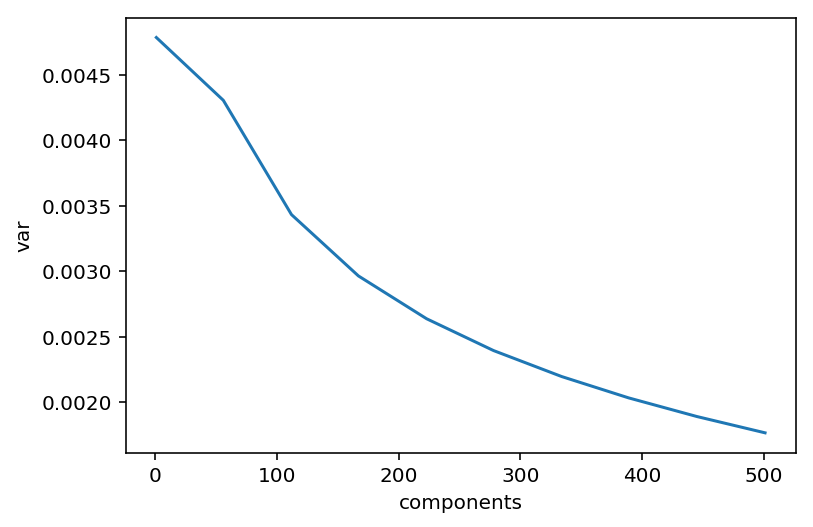

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

variance = np.zeros(10)
ii = 0
for kk in np.linspace(1,501, 10, dtype='int16'):
    lsa = TruncatedSVD(kk, algorithm = 'arpack')
    X_nor = lsa.fit(X_cat)
    variance[ii] = X_nor.explained_variance_ratio_.mean()
    ii += 1
    
plt.plot(np.linspace(1,501, 10, dtype='int16'),variance)
plt.xlabel('components')
dummy = plt.ylabel('var')
plt.show()

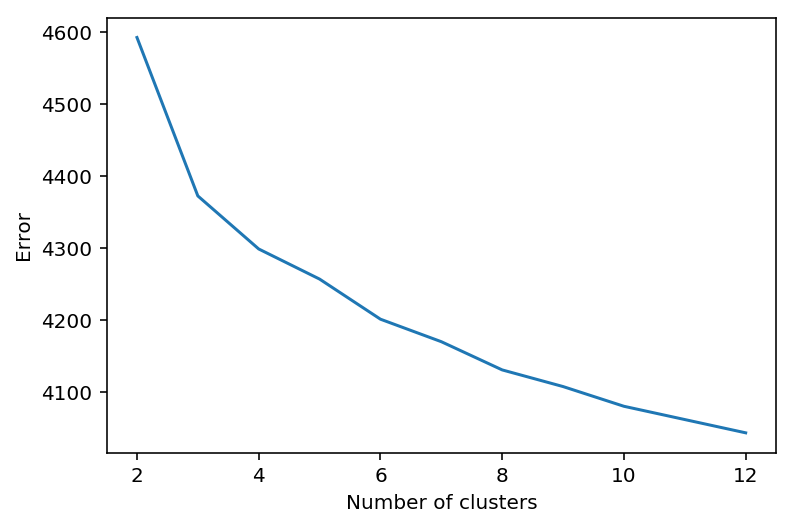

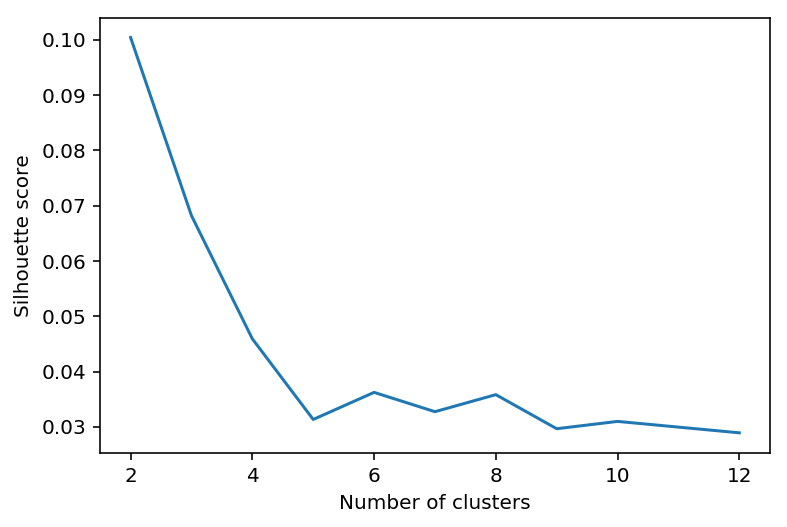

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics
lsa = TruncatedSVD(100, algorithm = 'arpack')
X_nor = lsa.fit_transform(X_cat)
X_nor = Normalizer(copy=False).fit_transform(X_nor)
variance = lsa.explained_variance_ratio_.mean()
location = 1000 * Normalizer(copy=False).fit_transform(np.column_stack((latitude, longitude)))
X_train = np.concatenate((X_nor, location), axis=1)

error = np.zeros(10)
sc = np.zeros(10)
ii = 0
for k in np.linspace(2, 12, 10, dtype='int8'):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=4, random_state=0)
    labels = kmeans.fit_predict(X_train)
    error[ii] = kmeans.inertia_
    sc[ii] = metrics.silhouette_score(X_train,labels)
    ii += 1
    
plt.plot(np.linspace(2, 12, 10, dtype='int8'), error)
plt.xlabel('Number of clusters')
dummy = plt.ylabel('Error')
plt.show()

plt.plot(np.linspace(2, 12, 10, dtype='int8'), sc)
plt.xlabel('Number of clusters')
dummy = plt.ylabel('Silhouette score')
plt.show()

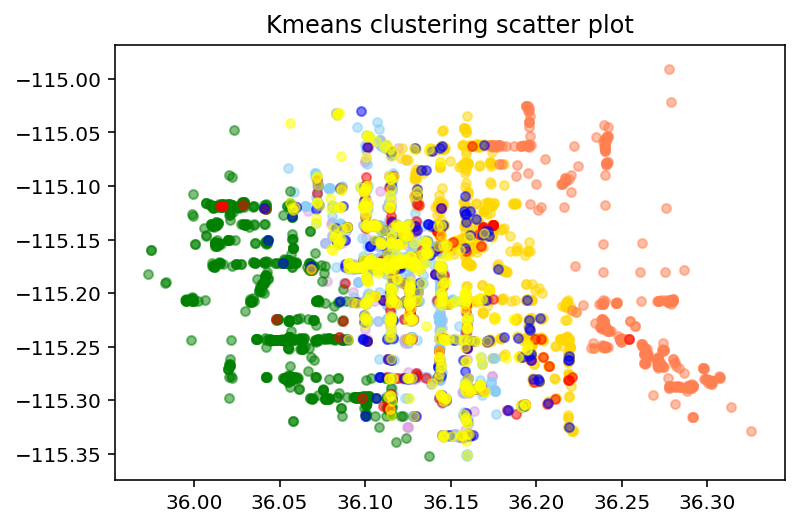

In [16]:

kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred = kmeans.fit_predict(X_train)
kmeans.inertia_

colors = ['plum', 'gold', 'lightskyblue', 'green', 'coral','red','blue','yellow'] 
for l in np.unique(pred):
    plt.scatter(latitude[pred==l], longitude[pred==l], s=20, color=colors[l], alpha=0.5)
plt.title('Kmeans clustering scatter plot')
plt.show()

In [1]:
# ri = metrics.adjusted_rand_score(labelsCat,labels)

# print(ri)